# Lab 1: Introduction to Genomics

### Name: Hyun Do Jung (hjung35)

### Due November 11, 2020 11:59 PM

Lab 1 contains an introductory exploration of some genomic data.

## Important Instructions - 

1. You are not allowed to use any in-built libraries for processing DNA sequencing data files
2. Please make changes only inside the *graded functions*. Do not make changes anywhere else in the notebook.
3. Please read the description of every graded function very carefully. The description clearly states what is the expectation of each graded function. 
4. After most graded functions, there is a cell which you can run and see if the expected output matches the output you are getting. 
5. The expected output provided is just a way for you to assess the correctness of your code. The code will be tested on other cases as well.

#### Preamble (Don't change this)

In [3]:
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring an Illumina *E. coli* dataset

First, let's look at the data in the file ``ecoli.fastq``.
It contains reads generated using an Illumina sequencing machine from the *E. coli* genome.

In [4]:
#reading Illumina fastq data

reads=""
with open("ecoli.fastq") as file:
    reads=file.read()

FASTQ is a standard file format for genomic data. See the wikipedia [article](https://en.wikipedia.org/wiki/FASTQ_format).
Let's look at the first 1000 characters:

In [5]:
print(reads[:1000])

@HISEQ03:379:C2WP8ACXX:7:1101:4288:2189 1:N:0:ACTTGA
TATTCAATTCAGACTACAGAGTGGGCGATTTTAATCTATGGACTGGTGATGATCTTCTTTTTATACATGTATGTTTGCTTCGCGTCGGCGGTTTATATCCCGGAGCTTTGGCCAACGCATTTACGCCTGCGCGGTTCGGGTTTCGTTAAT
+
CCCFFFFFHHHHHJJJJJJGIEFHJJJHIJJJJJJJJJJJJGHGJJFCEEGGIIHIIJJJJJIIIIIJJIJJJHHHFHHHFFFDDDDDDDD>>BCDEECDDDDBDDDDDCCDCDDDDDBB@DCDDDDDDDDDDDBDBBBB2<<>??CBDD
@HISEQ03:379:C2WP8ACXX:7:1101:4288:2189 2:N:0:ACTTGA
CACCGTGATCGACCCATAATGTGTTAATAATGCCGCAACGCCATAGGGCGTGAAGACTGCGACGATCCGTCCGACGGCATTAACGAAACCCGAACCGCGCAGGCGTAAATGCGTTGGCCAAAGCTCCGGGATATAAACCGCCGACGCGAA
+
CCCFFFFFHHHHHJJJJJJJJHHHIJJJJJIIJJJJIJJJJJIJIJJJJHFDFFFFEEEEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDBDBDDDDBDDDDBBDD@DDDBBDDDDDDCDCCDDDDDB>CCDDED@BDDD9<<BB79
@HISEQ03:379:C2WP8ACXX:7:1101:4591:2228 1:N:0:ACTTGA
AATTAAAAGACACCCAGCAGTTACAAAAGTGCGCTGATCGTCTTGCCCAGAGTGCGCAGGATTTTCGTCTGCAACTCGGTGAGCCAGGTTATCGCGGTAACCTGCGTGAGCTGTTAGCTAATCCGCAAATTCAGCGGGCATTTTTACTGC
+
@@@=BDDD???ACCF?HIBD<FAHIDDHE@E@G8:66?9DFHD7F8=F3===).75;@EH=?3;);>A=@?(>AC:><?,

Every block of four lines corresponds to one read:
1. Line 1 (starting with @) is a read ID
2. Line 2 is the DNA sequence
3. Line 3 usually only has a + sign
4. Line 4 has the same length as the DNA sequence. Each characters encodes the quality (or the reliability) of the corresponding symbol in the DNA sequence

## Graded function 1: parse_reads_illumina(reads) (10 marks)

Purpose - To parse the input read file and get a list of DNA reads.

Input - a string (``reads``) which contains the entire reads file. You should begin by first obtaining individual lines of the file. Each DNA read corresponds to the second line of each block of four lines.

Output - a list of DNA reads

In [8]:
#parsing illumina data
def parse_reads_illumina(reads) :
    '''
    Input - Illumina reads file as a string
    Output - list of DNA reads
    '''
    #start code here
    
    regex = re.compile("@.+\n\w+\n\+")
    dna_line123 = regex.findall(reads)
    dan_reads_illumina = list(map(lambda x: x.split('\n')[1], dna_line123))
    return dan_reads_illumina

    #end code here

In [9]:
dna_reads_illumina=parse_reads_illumina(reads)
print(len(dna_reads_illumina))
print(dna_reads_illumina[0]=="TATTCAATTCAGACTACAGAGTGGGCGATTTTAATCTATGGACTGGTGATGATCTTCTTTTTATACATGTATGTTTGCTTCGCGTCGGCGGTTTATATCCCGGAGCTTTGGCCAACGCATTTACGCCTGCGCGGTTCGGGTTTCGTTAAT")
print(dna_reads_illumina[1]=="CACCGTGATCGACCCATAATGTGTTAATAATGCCGCAACGCCATAGGGCGTGAAGACTGCGACGATCCGTCCGACGGCATTAACGAAACCCGAACCGCGCAGGCGTAAATGCGTTGGCCAAAGCTCCGGGATATAAACCGCCGACGCGAA")

644022
True
True


### Expected Output - 

644022

True

True

## Graded Function 2: unique_lengths(dna_reads) (10 marks)

Purpose - To return a set of all read lengths among all the DNA reads

Input - list of DNA reads

Output - set which contains different read lengths

In [6]:
#checking length distribution of reads
def unique_lengths(dna_reads) :
    '''
    Input - list of dna reads
    Output - set of counts of reads
    '''
    #start code here
    
    
    dan_lengths_list = list(map(lambda x: len(x), dna_reads))
    unique_length_set = set(dan_lengths_list)
    return unique_length_set
       
    #end code here

In [7]:
counts_illumina=unique_lengths(dna_reads_illumina)
print(counts_illumina)

{150}


### Expected Output - 

{150}

This is a well known property of Illumina sequencing machines: all reads returned have the same length. They usually return reads of lengths 75, 100, or 150.
Other technologies (as we will see below), may return a much wider range of read lengths.

Next we will look into the content of the actual reads. Are A, C, G, and T the only characters in the reads?

In [8]:
#set of possible DNA bases:
dna_chars=set(['A','C','G','T'])

## Graded Function 3 : check_impurity(dna_reads) (10 marks)

Purpose - To check if reads have any characters apart from the 4 defined above.

Input - list of DNA reads.

Output - you should output a set containing all the additional characters encountered and a list of all reads which contain any of those "impurity" characters.

In [9]:
#checking for impurities in reads
def check_impurity(dna_reads) :
    '''
    Input - list of dna reads
    Output - list of reads which have impurities, a set of impure chars 
    '''
    #start code here
    
    dna_chars=set(['A','C','G','T'])
    impure_dna_list = []
    impure_char_list = []
    for dna in dna_reads:
        impure_chars = set(dna.upper())-dna_chars
        if len(impure_chars) > 0 :
            impure_dna_list.append(dna)
            impure_char_list+=list(impure_chars)
    impure_char_set = set(impure_char_list)
    return impure_dna_list, impure_char_set

    #end code here

In [10]:
impure_reads_illumina,impure_chars_illumina=check_impurity(dna_reads_illumina)
print(len(impure_reads_illumina))
print(impure_chars_illumina)

1368
{'N'}


The symbol N is used to represented undetermined bases (i.e., bases where the sequencing machine failed to do a proper reading)

### Expected Output - 

1368

{'N'}

## Graded Function 4 : get_read_counts(dna_reads) (10 marks)

Purpose - To compute the number of times each read occurs in the entire collections of reads.

Input - list of DNA reads

Output - you should output a dictionary where the read is the key and the number of times it appears is the value. The dictionary should be sorted by value in descending order. 

Note - You can use OrderedDict to keep sorted values to ensure order is maintained after sorting

In [11]:
#getting count of all reads
from collections import OrderedDict
def get_read_counts(dna_reads) :
    '''
    Input - list of dna reads
    Output - dictionary with key as read and value as the no. of times it occurs. The dictionary should be sorted by
    counts in descending order
    '''
    #start code here
    dna_counts = OrderedDict()
    for dna in dna_reads:
        if dna in dna_counts:
            dna_counts[dna]+=1
        else:
            dna_counts[dna]=1
    return OrderedDict(sorted(dna_counts.items(), key=lambda item: item[1], reverse=True))
    #end code here

In [12]:
reads_counts_illumina=get_read_counts(dna_reads_illumina)
print(list(reads_counts_illumina.values())[:5])
print(len(reads_counts_illumina.keys()))

[11, 7, 7, 6, 6]
616342


### Expected Output -

[11, 7, 7, 6, 6]

616342

### Plotting read frequencies

We will now use the count dictionary from above to generate a histogram of counts vs no. of reads with that count(log scale)

In [13]:
def plot_frequency_histogram(read_counts) :
    plt.yscale('log', nonposy='clip')
    plt.hist([read_counts[key] for key in read_counts],bins=[i for i in range(13)])
    plt.xlabel("count values")
    plt.ylabel("no. of reads")
    plt.show()

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


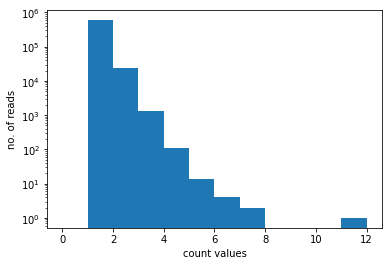

In [14]:
plot_frequency_histogram(reads_counts_illumina)

Notice that most reads appear only once, and it is rare for the same read to appear many times.
This is expected, since the reads are drawn roughly uniformly at random from the whole genome.

## Exploring a PacBio *E. coli* dataset

Next, we will look into a read dataset obtained using a Pacific Biosciences (PacBio) machine, from the same *E. coli* genome.

In [15]:
#reading PacBio data
reads_pac=""
with open("ecoli_pac-bio.fasta") as file :
    reads_pac=file.read()

As in the case of the Illumina dataset, let's look at the beginning of the file:

In [16]:
print(reads_pac[:2000])

>m140930_121059_sherri_c100688052550000001823139503241542_s1_p0/24/0_7424 RQ=0.846
aaaaaaaaaaaaaaaaacaaaaaaaaaaaaaaaaaaaaagggggggggggggaaaggaggggaaaagaaaaaaaaaaaaa
aaaaaaaaaaaaaattgggggcccccccccaaaaaggaaaaattctctttttcaaacaaaaaacggtgttttttttctgg
gtggtttgggggcgaaaataaatcgcttcctttgtcttttggggccccactcctttcttcgatcagcgttttgccagcaa
aacgcaattttttttttttctttcgttttttagaagggtaaagaaacagctttcttttctttaaataggttttggccccg
tttttttcctgtttccggttccacttcaatatattttcgccattgtttccatctgcttccgaaacgccagttttcacgta
ccccggtatcgcaagcgtggcggaggaaacagccatgtttgaggcgctggtttgcaggcggcatacggcgggaacagcca
gcggatatctttaataaagcgcagaaatcgtaacaatgcgatcggcttcgtccagtaccacgcacctgaatggcacgcga
ggtttaatgtggttctgcttggcggtagtcattaagagccccgtggtggccaatcaagaaaatgtcacgccgcttcccag
cactttcagctgttttgtcgtagcccatcaccaccgtaagccaagacccagcttcaggccaagtagccttccgccagcgg
ttctgcgtcggcatggattctgcacggcaaagttcacgcgtcggtttgccataattaaggacgcgcctggattcaccttg
cgatcggcaatcgcaggaatgagagagcagataatgaaagcgttgacgtaagaaagccatcgttttcccggtaccggttt
ttgcgcctgcccggctacgtcagcga

Unlike the Illumina file, which was in the FASTQ format, this one is in the FASTA format.
The FASTA format is simpler.
Each line starting with a '>' contains the read ID.
After that, many lines may follow, with the content of a single read.

## Graded Function 5: parse_reads_pac(reads) (10 marks)

Purpose - To parse the input read file and obtain a list of DNA reads.

Input - a string which contains the entire PacBio reads file. You should begin by first getting individual lines of the file. Every two reads are separated by a line which begins with '>'. Note that reads can span across several lines in this case as opposed to single line reads in the Illumina file.

Output - a list of DNA reads

In [17]:
#parsing pac-bio data
def parse_reads_pac(reads) :
    '''
    Input - pac bio reads file as a string
    Output - list of dna reads
    '''
    #start code here
    dna_lb_list = re.split('>.+\n', reads)[1:]
    return list(map(lambda x: x.replace('\n','') ,dna_lb_list))
    #end code here

In [18]:
dna_reads_pac=parse_reads_pac(reads_pac)
print(len(dna_reads_pac))
for i in range(5) :
    print(len(dna_reads_pac[i]))

1004
7424
16512
9001
17342
18095


### Expected Output - 

1004

7424

16512

9001

17342

18095

Notice that, unlike the Illumina dataset, the PacBio data has reads of very different lengths, and some of the reads are very long.

In [19]:
n_pac=len(dna_reads_pac)
print(n_pac)

1004


## Plotting the distribution of read lengths

In [20]:
#getting distribution of length of reads
lengths_pac=[]
for read in dna_reads_pac :
    lengths_pac.append(len(read))

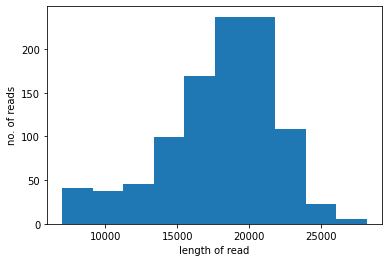

In [21]:
plt.hist(lengths_pac)
plt.xlabel("length of read")
plt.ylabel("no. of reads")
plt.show()

## Checking for impurity symbols

We will now check if the PacBio dataset has any reads that contain any symbols apart from {A,C,G,T}

In [22]:
impure_reads_pac,impure_chars_pac=check_impurity(dna_reads_pac)

In [23]:
print(len(impure_reads_pac))
impure_chars_pac

0


set()

### Expected Output - 

0

set()